In [2]:
import libsql_experimental as libsql
import pandas as pd
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt

2025-02-18T00:15:02.777426Z  INFO libsql::replication::remote_client: Attempting to perform handshake with primary.
2025-02-18T00:15:03.220903Z  WARN libsql::replication::remote_client: Frames prefetching failed because of new session token returned by handshake


/tmp/ipykernel_13015/3815793755.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


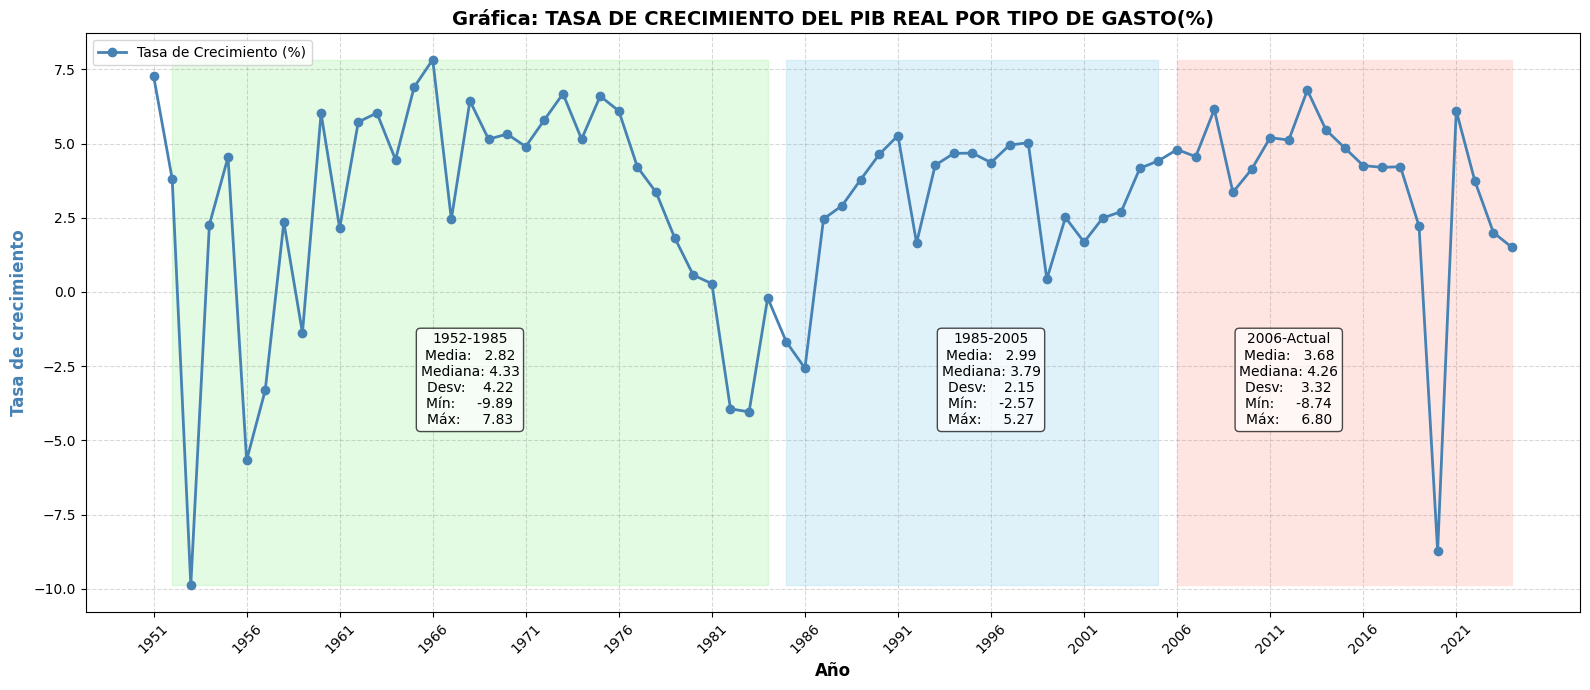

In [3]:
load_dotenv()
url = os.getenv("TURSO_DATABASE_URL")
auth_token = os.getenv("TURSO_AUTH_TOKEN")
conn = libsql.connect("proyectomacro.db", sync_url=url, auth_token=auth_token)
cursor = conn.cursor()
conn.sync()

query = "SELECT Año, Crecimiento FROM Tasa_Crecimiento_PIB"
df = pd.read_sql_query(query, conn)
df.set_index("Año", inplace=True)

# Filtramos por cada período
df_period1 = df.loc[(df.index >= 1950) & (df.index < 1985)]
df_period2 = df.loc[(df.index >= 1985) & (df.index <= 2005)]
df_period3 = df.loc[(df.index >= 2006)]

# Función para calcular estadísticos
def calcular_estadisticas(sub_df):
    return {
        "mean":   sub_df["Crecimiento"].mean(),
        "median": sub_df["Crecimiento"].median(),
        "std":    sub_df["Crecimiento"].std(),
        "min":    sub_df["Crecimiento"].min(),
        "max":    sub_df["Crecimiento"].max()
    }

stats_p1 = calcular_estadisticas(df_period1) if not df_period1.empty else None
stats_p2 = calcular_estadisticas(df_period2) if not df_period2.empty else None
stats_p3 = calcular_estadisticas(df_period3) if not df_period3.empty else None

# Texto formateado para la caja de estadísticas
def crear_texto_estadisticas(nombre_periodo, stats_dict):
    return (
        f"{nombre_periodo}\n"
        f"Media:   {stats_dict['mean']:.2f}\n"
        f"Mediana: {stats_dict['median']:.2f}\n"
        f"Desv:    {stats_dict['std']:.2f}\n"
        f"Mín:     {stats_dict['min']:.2f}\n"
        f"Máx:     {stats_dict['max']:.2f}"
    )

fig, ax1 = plt.subplots(figsize=(16, 7))

# Graficar la línea principal
ax1.plot(
    df.index, df['Crecimiento'],
    label='Tasa de Crecimiento (%)', marker='o', color='steelblue',
    linestyle='-', linewidth=2
)
ax1.set_title('Gráfica: TASA DE CRECIMIENTO DEL PIB REAL POR TIPO DE GASTO(%)', fontsize=14, fontweight='bold')
ax1.set_xlabel("Año", fontsize=12, fontweight='bold')
ax1.set_ylabel("Tasa de crecimiento", fontsize=12, fontweight='bold', color='steelblue')
ax1.legend(loc='upper left')
ax1.grid(visible=True, linestyle='--', color='gray', alpha=0.3)
ax1.tick_params(axis='x', labelrotation=45)

# Sombrear los períodos
years = df.index
ax1.fill_between(
    years, df['Crecimiento'].min(), df['Crecimiento'].max(),
    where=(years >= 1952) & (years < 1985),
    color='lightgreen', alpha=0.25, label="1952-1985"
)
ax1.fill_between(
    years, df['Crecimiento'].min(), df['Crecimiento'].max(),
    where=(years >= 1985) & (years <= 2005),
    color='skyblue', alpha=0.25, label="1985-2005"
)
ax1.fill_between(
    years, df['Crecimiento'].min(), df['Crecimiento'].max(),
    where=(years >= 2006) & (years <= df.index[-1]),
    color='mistyrose', alpha=0.95, label="2006-Actual"
)

# Para ubicar las anotaciones de forma ordenada, calculamos la posición X
# como el punto medio entre el mínimo y máximo año de cada periodo,
# y la posición Y en la media del periodo para no tapar tanto la línea.

def anotar_periodo(df_periodo, stats_dict, nombre_periodo,x,y):
    if df_periodo.empty or stats_dict is None:
        return
    ax1.annotate(
        crear_texto_estadisticas(nombre_periodo, stats_dict),
        xy=(x, y),
        xytext=(0, 20),               # offset vertical para separarlo de la línea
        textcoords='offset points',
        fontsize=10,
        ha='center', 
        va='bottom',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7)
    )

# Anotamos cada período
anotar_periodo(df_period1, stats_p1, "1952-1985",1968,-5.5)
anotar_periodo(df_period2, stats_p2, "1985-2005",1996,-5.5)
anotar_periodo(df_period3, stats_p3, "2006-Actual",2012,-5.5)

plt.xticks(df.index[::5])
plt.tight_layout()
plt.show()

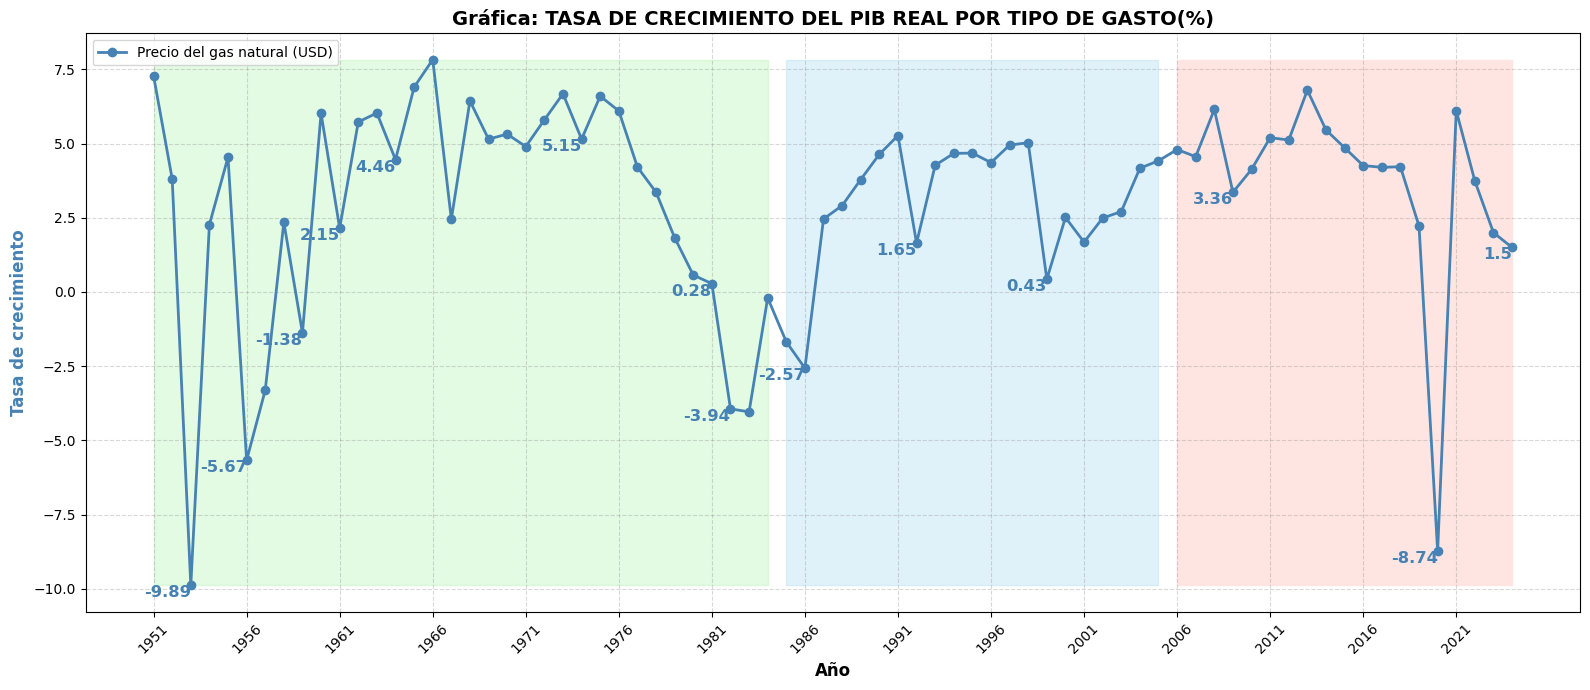

In [4]:
# Plot
fig, ax1 = plt.subplots(figsize=(16, 7))
# Line plot on ax1
ax1.plot(
    df.index, df['Crecimiento'], 
    label='Precio del gas natural (USD)', marker='o', color='steelblue', 
    linestyle='-', linewidth=2
)
ax1.set_title('Gráfica: TASA DE CRECIMIENTO DEL PIB REAL POR TIPO DE GASTO(%)', fontsize=14, fontweight='bold')
ax1.set_xlabel("Año", fontsize=12, fontweight='bold')
ax1.set_ylabel("Tasa de crecimiento", fontsize=12, fontweight='bold', color='steelblue')
ax1.legend(loc='upper left')
ax1.grid(visible=True, linestyle='--', color='gray', alpha=0.3)

# Rotate x-axis labels
ax1.tick_params(axis='x', labelrotation=45)



ax1_years_to_annotate_bottom = []
for year in ax1_years_to_annotate_bottom:
    if year in df.index:
        value = df.loc[year, 'Crecimiento']
        ax1.text(year, value, f'{value}', ha='right', va='bottom' if value > 0 else 'top', 
                 fontsize=11.8, color='steelblue', fontweight='bold')

ax1_years_to_annotate_down = [1953, 1956, 1959, 1961, 1964, 1974, 1981, 1982, 1986, 1992, 1999, 2009, 2020, 2024]
for year in ax1_years_to_annotate_down:
    if year in df.index:
        value = df.loc[year, 'Crecimiento']
        ax1.text(year, value, f'{value}', ha='right', va='top', 
                 fontsize=11.8, color='steelblue', fontweight='bold')
    
years = df.index       
ax1.fill_between(
    years, df['Crecimiento'].min(), df['Crecimiento'].max(), 
    where=(years >= df.index[0]) & (years < 1985),color='lightgreen', alpha=0.25, label="1952-1985 Area"
)
ax1.fill_between(
    years, df['Crecimiento'].min(), df['Crecimiento'].max(), 
    where=(years >= 1985) & (years <= 2005),color='skyblue', alpha=0.25, label="1985-2005 Area"
)
ax1.fill_between(
    years, df['Crecimiento'].min(), df['Crecimiento'].max(), 
    where=(years >= 2006) & (years <= df.index[-1]),color='mistyrose', alpha=0.95, label="2005-2023 Area"
)
plt.xticks(df.index[::5])
plt.tight_layout()
plt.show()

In [5]:
año=[1970+i for i in range(10)]
#por libra fina
estaño=[1.68,1.58,1.69,2.11,3.60,3.11,3.40,4.78,5.72,6.77]
cobre=[0.636,0.480,0.470,0.743,0.90,0.55,0.62,0.59,0.61,0.87]
zinc=[0.14,0.153,0.176,0.24,0.35,0.37,0.36,0.33,0.27,0.36]
plomo=[0.138,0.115,0.134,0.189,0.268,0.192,0.204,0.279,0.297,0.528]
bismuto=[5.83,3.82,2.54,3.46,8.23,5.59,5.64,4.01,2.10,2.28]
#Por unidad larga
wolfram=[75.34,54.07,38.20,41.34,82.38,89.50,108.75,165.80,142.06,136.23]
antiomonio=[28.70,8.53,7.17,11.76,23.01,14.13,17.97,15.51,14.06,16.14]
#por onza troy fina
plata=[1.26,1.53,1.64,2.36,4.58,4.38,4.30,4.56,5.30,10.29]
df2=pd.DataFrame({'Año':año,'Estaño':estaño,'Cobre':cobre,'Zinc':zinc,'Plomo':plomo,'Bismuto':bismuto,'Wolfram':wolfram,'Antimonio':antiomonio,'Plata':plata})
df2

,Año,Estaño,Cobre,Zinc,Plomo,Bismuto,Wolfram,Antimonio,Plata
0,1970,1.68,0.636,0.140,0.138,5.83,75.34,28.70,1.26
1,1971,1.58,0.480,0.153,0.115,3.82,54.07,8.53,1.53
2,1972,1.69,0.470,0.176,0.134,2.54,38.20,7.17,1.64
3,1973,2.11,0.743,0.240,0.189,3.46,41.34,11.76,2.36
4,1974,3.60,0.900,0.350,0.268,8.23,82.38,23.01,4.58
5,1975,3.11,0.550,0.370,0.192,5.59,89.50,14.13,4.38
6,1976,3.40,0.620,0.360,0.204,5.64,108.75,17.97,4.30
7,1977,4.78,0.590,0.330,0.279,4.01,165.80,15.51,4.56
8,1978,5.72,0.610,0.270,0.297,2.10,142.06,14.06,5.30
9,1979,6.77,0.870,0.360,0.528,2.28,136.23,16.14,10.29


In [6]:
#bcb 1969
año2=[1964+i for i in range(6)]
#Por libra fina
estaño2=[1.53,1.75,1.629,1.505,1.462,1.63]
cobre2=[0.297,0.338,0.4837,0.4615,0.5033,0.60]
plomo2=[0.129,0.15,0.14,0.11,0.11,0.12]
zinc2=[0.1622,0.1416,0.1358,0.12,0.11,0.13]
bismuto2=[1.60,2.41,2.268,2.10,2.10,2.49]
#Por unidad larga
wolfram2=[11.38,20,33.08,41.58,43.21,48.79]
antimonio2=[5.98,7.08,5.04,5.65,5.49,8.28]
#por onza troy fina
plata2=[1.28,1.29,1.29,1.50,2.14,1.79]

In [7]:
#bcb 1964
año3=[1960+i for i in range(4)]
#Por libra fina
estaño3=[1.01,1.12,1.1388,1.15]
cobre3=[0.30,0.277,0.28,0.28]
zinc3=[0.113,0.115,0.11625,0.12]
plomo3=[0.12,0.11,0.10,0.1066]
bismuto3=[1.45,1.45,1.45,1.45]
#por unidad larga
wolfram3=[16.83,16.23,10.26,8.56]
antimonio3=[3.10,3.88,4.17,3.88]
#por onza troy fina
plata3=[0.91,0.91,1.262,1.20]

In [8]:
año4=[1956+i for i in range(4)]
#Por libra fina
estaño4=[1,0.92,0.99,1.019]
cobre4=[0.38,0.26,0.29,0.2825]
plomo4=[0.16,0.13,0.13,0.12]
zinc4=[0.135,0.105,0.11,0.1125]
bismuto4=[1.30,1.45,1.45,1.45]
#Por unidad larga
wolfram4=[25,10.37,10,10.625]
antimonio4=[3.20,2.27,2.70,3.05]
#Por onza troy fina
plata4=[0.90,0.90,0.90,0.9067]
df4=pd.DataFrame({'Año':año4,'Estaño':estaño4,'Cobre':cobre4,'Plomo':plomo4,'Zinc':zinc4,'Bismuto':bismuto4,'Wolfram':wolfram4,'Antimonio':antimonio4,'Plata':plata4})

In [9]:
df4

,Año,Estaño,Cobre,Plomo,Zinc,Bismuto,Wolfram,Antimonio,Plata
0,1956,1.000,0.3800,0.16,0.1350,1.30,25.000,3.20,0.9000
1,1957,0.920,0.2600,0.13,0.1050,1.45,10.370,2.27,0.9000
2,1958,0.990,0.2900,0.13,0.1100,1.45,10.000,2.70,0.9000
3,1959,1.019,0.2825,0.12,0.1125,1.45,10.625,3.05,0.9067


In [10]:
años = [
  1956, 1957, 1958, 1959,
  1960, 1961, 1962, 1963,
  1964, 1965, 1966, 1967, 1968, 1969,
  1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979
]
#bien
estaño = [
  1,       0.92,    0.99,    1.019,
  1.01,    1.12,    1.1388,  1.15,
  1.53,    1.75,    1.629,   1.505,  1.462,  1.63,
  1.68,    1.58,    1.69,    2.11,   3.60,   3.11,   3.40,   4.78,   5.72,   6.77
]
#bien
cobre = [
  0.38,    0.26,    0.29,    0.2825,
  0.30,    0.277,   0.28,    0.28,
  0.297,   0.338,   0.4837,  0.4615, 0.5033, 0.60,
  0.636,   0.480,   0.470,   0.743,  0.90,   0.55,   0.62,   0.59,   0.61,   0.87
]
#bien
zinc = [
  0.135,   0.105,   0.11,    0.1125,
  0.113,   0.115,   0.11625, 0.12,
  0.1622,  0.1416,  0.1358,  0.12,   0.11,   0.13,
  0.14,    0.153,   0.176,   0.24,   0.35,   0.37,   0.36,   0.33,   0.27,   0.36
]
#bien
plomo = [
  0.16,    0.13,    0.13,    0.12,
  0.12,    0.11,    0.10,    0.1066,
  0.129,   0.15,    0.14,    0.11,   0.11,   0.12,
  0.138,   0.115,   0.134,   0.189,  0.268,  0.192,  0.204,  0.279,  0.297,  0.528
]
#bien
bismuto = [
  1.30,    1.45,    1.45,    1.45,
  1.45,    1.45,    1.45,    1.45,
  1.60,    2.41,    2.268,   2.10,   2.10,   2.49,
  5.83,    3.82,    2.54,    3.46,   8.23,   5.59,   5.64,   4.01,   2.10,   2.28
]
#bien
wolfram = [
  25,      10.37,   10,      10.625,
  16.83,   16.23,   10.26,   8.56,
  11.38,   20,      33.08,   41.58,  43.21,  48.79,
  75.34,   54.07,   38.20,   41.34,  82.38,  89.50, 108.75, 165.80, 142.06, 136.23
]

#UNIDADES LARGAS
# antimonio = [
#   3.20,    2.27,    2.70,    3.05,
#   3.10,    3.88,    4.17,    3.88,
#   5.98,    7.08,    5.04,    5.65,   5.49,   8.28,
#   28.70,   8.53,    7.17,    11.76,  23.01,  14.13, 17.97,  15.51,  14.06,  16.14
# ]

antimonio = [
  314.91, 223.42, 265.71, 300.16,
  305.07, 381.68, 410.28, 381.68,
  588.25, 696.83, 495.98, 555.85,
  539.55, 814.73, 2822.27, 839.16,
  705.91, 1157.48, 2262.34, 1391.33,
  1767.12, 1525.26, 1384.81, 1588.01
]

plata = [
  0.90,    0.90,    0.90,    0.9067,
  0.91,    0.91,    1.262,   1.20,
  1.28,    1.29,    1.29,    1.50,    2.14,   1.79,
  1.26,    1.53,    1.64,    2.36,   4.58,   4.38,   4.30,   4.56,   5.30,   10.29
]
